In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (14, 6)

%matplotlib inline

In [122]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [123]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Exploratory Data Analysis & Feature Engineering

In [124]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

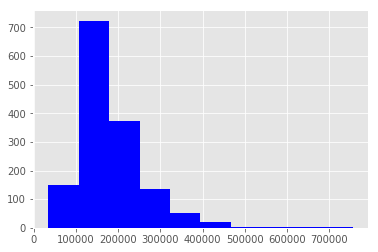

In [125]:
plt.hist(train['SalePrice'], color='blue')
plt.show()

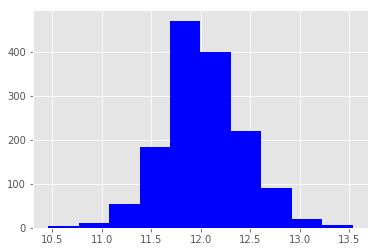

In [126]:
target = np.log(train['SalePrice'])
plt.hist(target, color='blue')
plt.show()

### Before diving into the numeric features...

In [127]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### Street: Type of road access to property

In [128]:
print(train['Street'].value_counts())

train['Street'] = pd.get_dummies(train['Street'], drop_first=True)
holdout['Street'] = pd.get_dummies(train['Street'], drop_first=True)
print(train['Street'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
1    1454
0       6
Name: Street, dtype: int64


#### LotShape: General shape of property

In [129]:
train['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

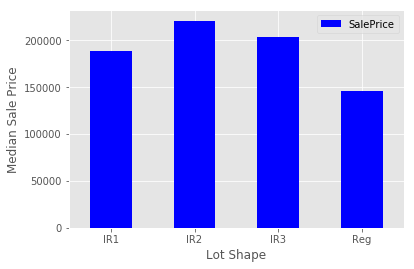

In [130]:
lot_shape_pivot = train.pivot_table(index='LotShape', values='SalePrice', aggfunc=np.median)
lot_shape_pivot.plot(kind='bar', color='blue')
plt.xlabel('Lot Shape')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [131]:
def encode(x): return 0 if x == 'Reg' else 1


train['LotShape'] = train['LotShape'].apply(encode)
holdout['LotShape'] = holdout['LotShape'].apply(encode)

### Utilities: Type of utilities available

In [132]:
train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

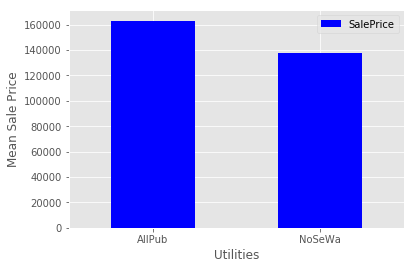

In [133]:
utilities_pivot = train.pivot_table(index='Utilities', values='SalePrice', aggfunc=np.median)
utilities_pivot.plot(kind='bar', color='blue')
plt.xlabel('Utilities')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=0)
plt.show()

In [134]:
def encode(x): return 1 if x == 'AllPub' else 0


train['Utilities'] = train['Utilities'].apply(encode)
holdout['Utilities'] = holdout['Utilities'].apply(encode)

#### SaleCondition

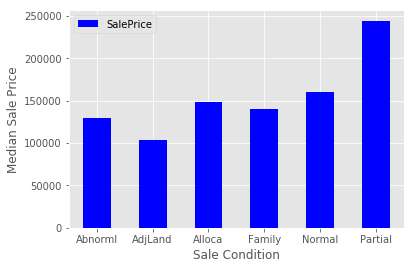

In [135]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

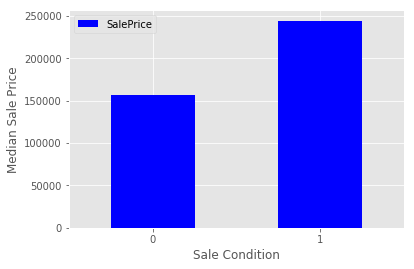

In [136]:
def encode(x): return 1 if x == 'Partial' else 0


train['SaleCondition'] = train['SaleCondition'].apply(encode)
holdout['SaleCondition'] = holdout['SaleCondition'].apply(encode)

condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

#### MSZoning: Identifies the general zoning classification of the sale.

In [137]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

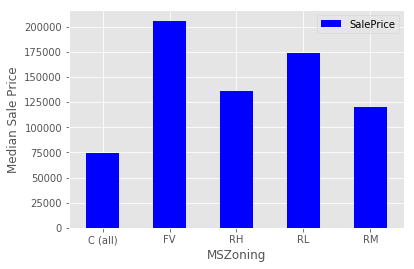

In [138]:
pivot = train.pivot_table(index='MSZoning', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('MSZoning')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

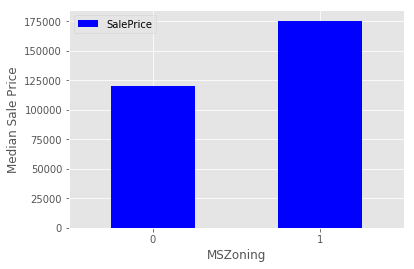

In [141]:
def encode(x): return 1 if ((x == 'FV') | (x == 'RL')) else 0
    

train['MSZoning'] = train['MSZoning'].apply(encode)
holdout['MSZoning'] = holdout['MSZoning'].apply(encode)

pivot = train.pivot_table(index='MSZoning', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('MSZoning')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### And now, the numeric features:

In [142]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             uint8
LotShape           int64
Utilities          int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64


In [143]:
corr = numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [144]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

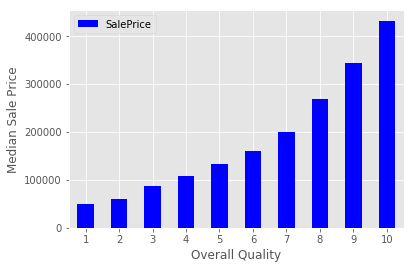

In [145]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

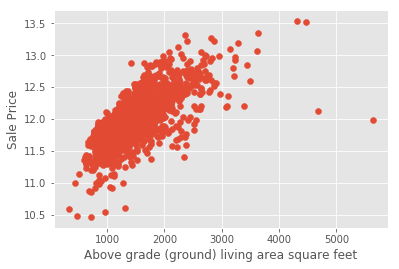

In [146]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

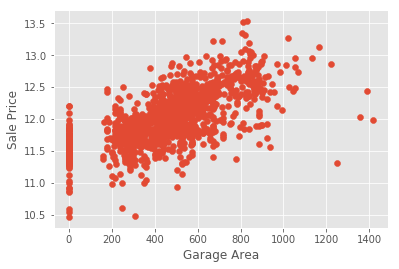

In [147]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

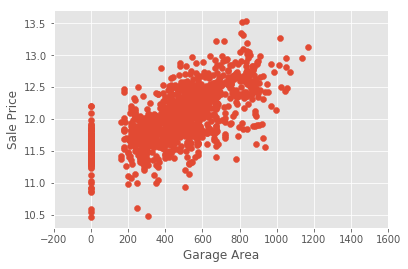

In [148]:
train = train[train['GarageArea'] < 1200]

plt.scatter(x=train['GarageArea'], y=np.log(train['SalePrice']))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [149]:
missing = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
missing.columns = ['missing']
missing.index.name = 'Feature'
missing

,missing
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [150]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)

0

## Modeling

In [151]:
y = np.log(train['SalePrice'])
X = data.drop(['SalePrice', 'Id'], axis=1)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=.2)

In [153]:
X_train.shape

(1164, 41)

In [154]:
lr = LinearRegression()
lm = lr.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [155]:
print('R^2 = {}'.format(lm.score(X_test, y_test)))
print('RMSE = {}'.format(mean_squared_error(y_test, predictions)))

R^2 = 0.8206303356116508
RMSE = 0.026699178605276267


### Improving the model with regularization

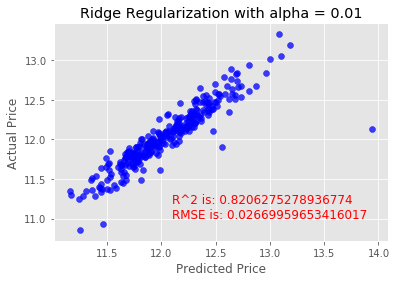

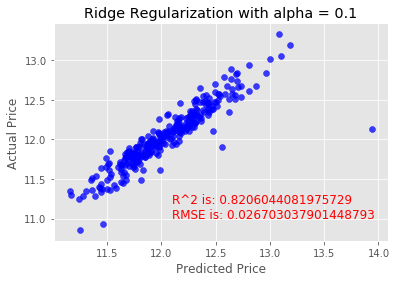

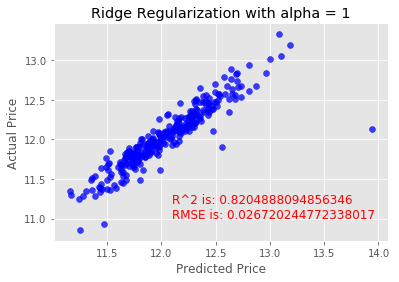

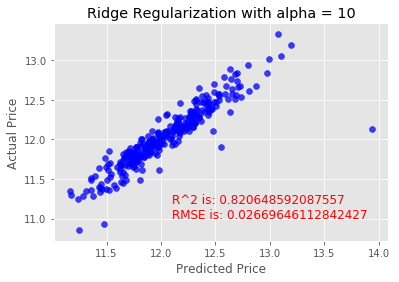

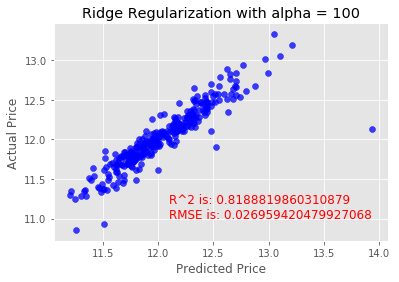

In [156]:
for i in range (-2, 3):
    alpha = 10**i
    rm = Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
        ridge_model.score(X_test, y_test), 
        mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1,11), size='large', color='red')
    plt.show()

## Submission

In [157]:
features = holdout.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

predictions = lm.predict(features)
predictions = np.exp(predictions) # to revert log() do exp()

submission = pd.DataFrame({'Id': holdout['Id'], 'SalePrice': predictions})
submission.head()

,Id,SalePrice
0,1461,114358.708530
1,1462,149568.703006
2,1463,172729.344070
3,1464,196091.892962
4,1465,185119.384206


In [158]:
submission.to_csv('submission_v4.csv', index=False)